## Машинное обучение, ФКН ВШЭ

## Практическое задание 3

### Общая информация
Дата выдачи: 22.09.2018

Мягкий дедлайн: 7:59MSK 02.10.2018

Жесткий дедлайн: 23:59MSK 03.10.2018

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

In [625]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [511]:
df=pd.read_csv('homework-practice-03-data.csv')

## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [626]:
from sklearn.model_selection import train_test_split

x_train, x_test= train_test_split(df, train_size=0.8, random_state=42)

#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [628]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

lr_pipeline=Pipeline([
    ('std_scaler', MinMaxScaler()),
    ('lr', LinearRegression()),
       
])
y_train=x_train['f1']
del(x_train['f1'])
y_test=x_test['f1']
del(x_test['f1'])

lr=lr_pipeline.fit(x_train, y_train)
test_p = lr.predict(x_test)

print('LinearRegression(score R2) %.10f\n' % r2_score(y_test, test_p))

lasso_pipeline=Pipeline([
    ('std_scaler', MinMaxScaler()),
    ('lr', Lasso(alpha=0.01)),
       
])

lasso=lasso_pipeline.fit(x_train, y_train)
test_l=lasso.predict(x_test)
print('Lasso(score R2) %.10f\n' % r2_score(y_test, test_l))

LinearRegression(score R2) 0.4799408988

Lasso(score R2) 0.5342563646



#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [491]:
print('Lasso coef ')
print(lasso.named_steps.lr.coef_)
print('Number of zero coef')
print(len(lasso.named_steps.lr.coef_)-len(lasso.named_steps.lr.coef_.nonzero()[0]))
print('LinearRegression coef ')
print(lr.named_steps.lr.coef_)
print('Number of zero coef')
print(len(lr.named_steps.lr.coef_)-len(lr.named_steps.lr.coef_.nonzero()[0]))
#Количество строго нулевых весов больше в Lasso-моделе

Lasso coef 
[ 4.52409084 -0.         -0.          0.03807787  0.72527362  0.        ]
Number of zero coef
3
LinearRegression coef 
[ 4.76700358 -0.08580226 -0.28849796  0.10520103  1.38159276  0.01781414]
Number of zero coef
0


#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

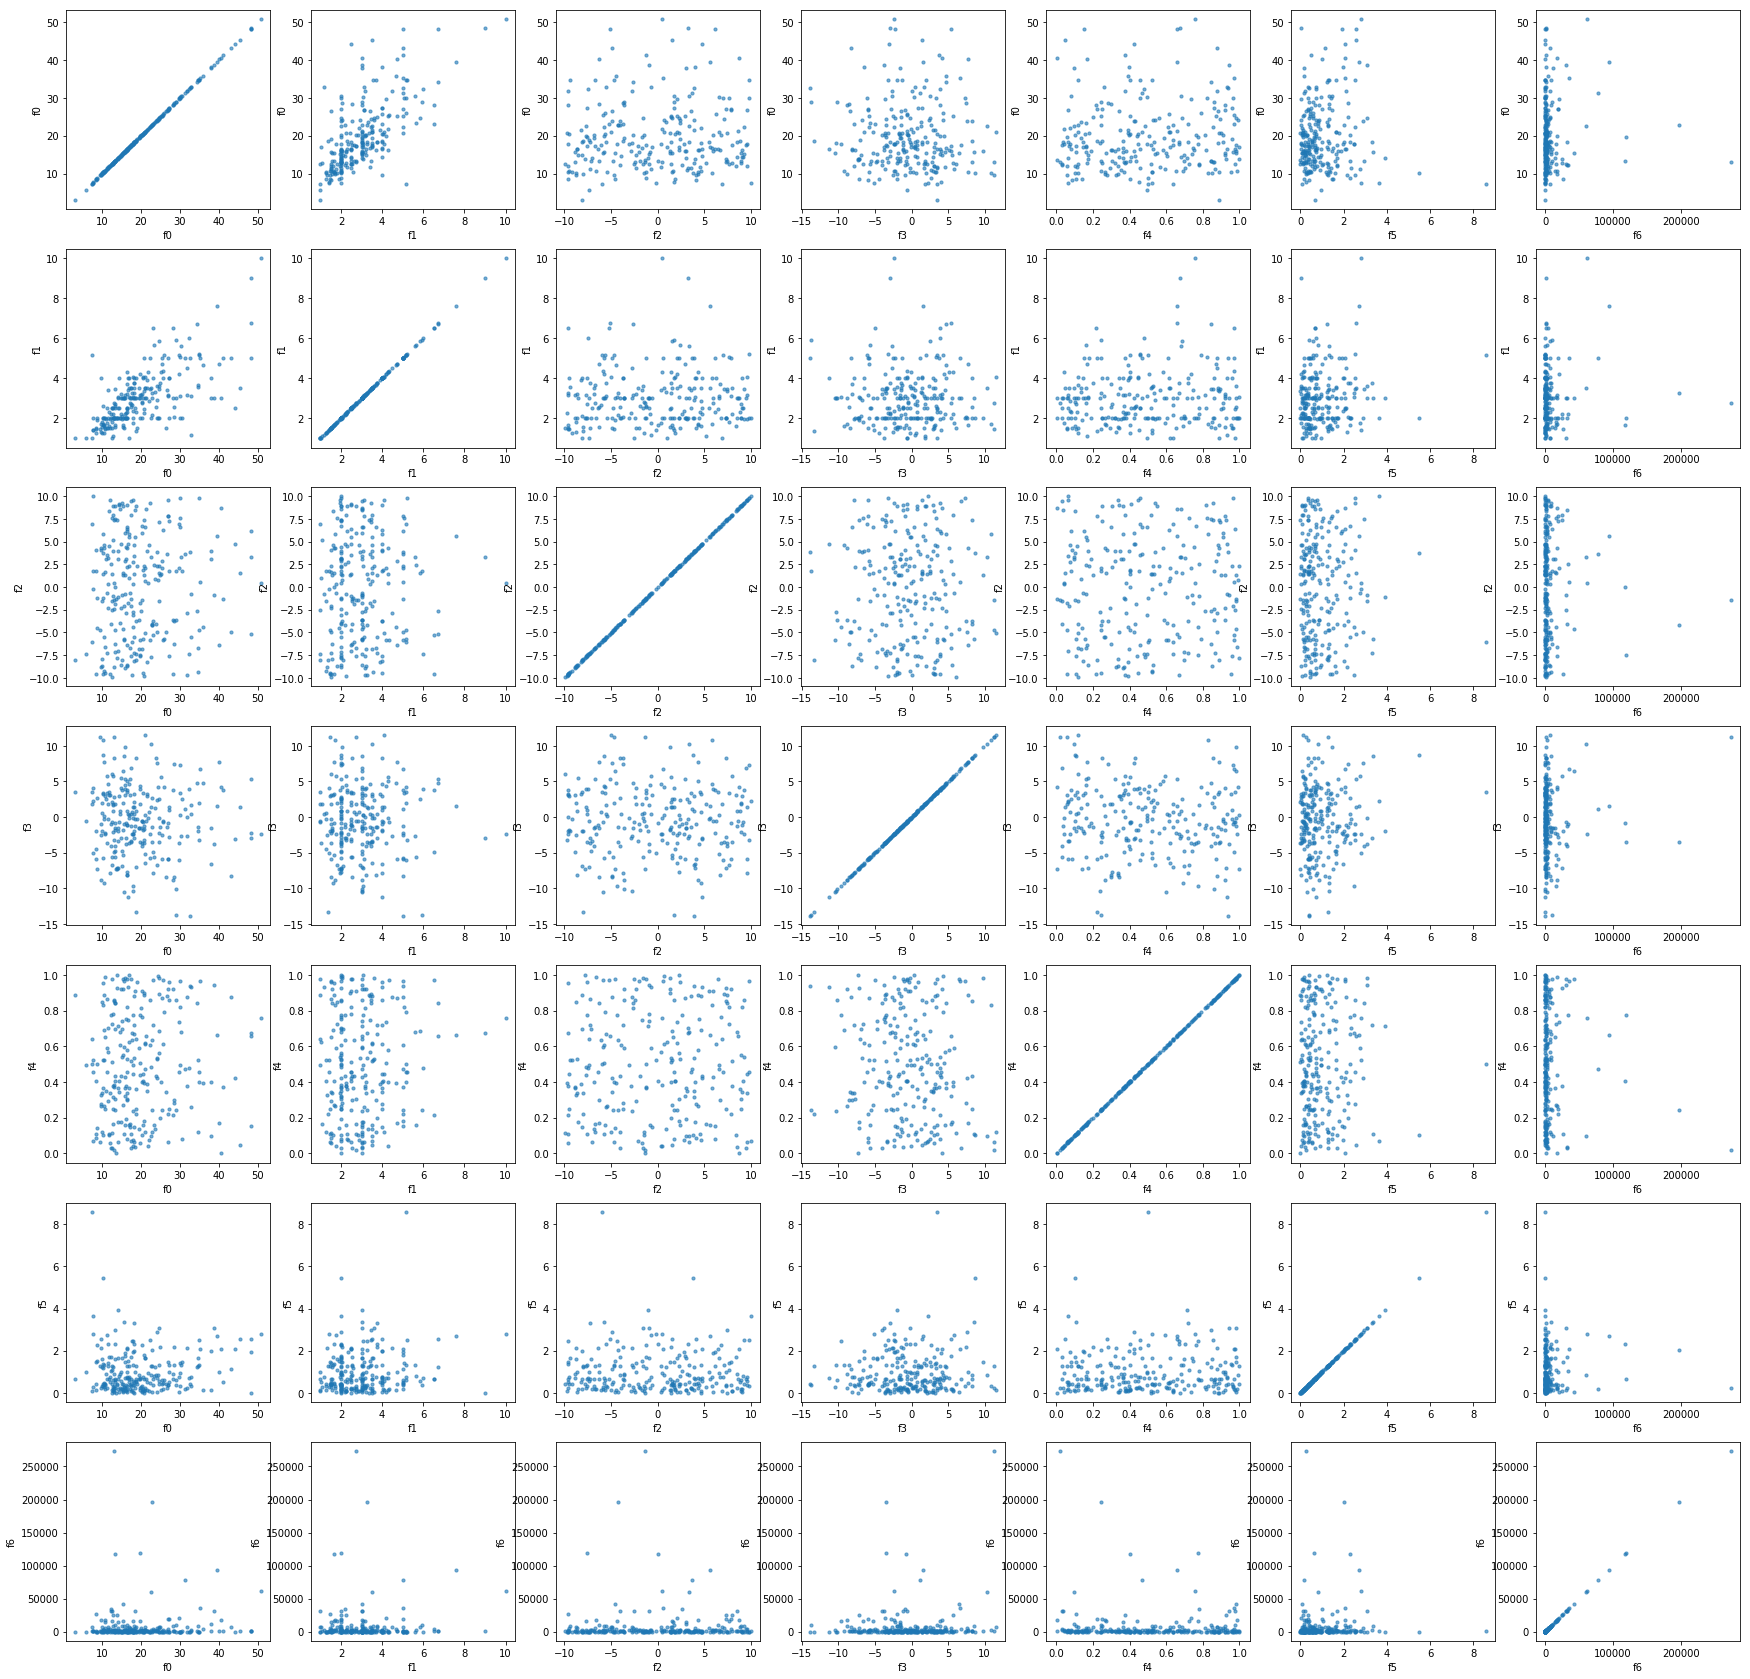

f0    0.675734
f1    1.000000
f2    0.037508
f3   -0.016636
f4    0.073025
f5    0.133059
f6    0.062799
Name: f1, dtype: float64

In [559]:
import matplotlib.pyplot as plt

def pairplot(df):
    ncol, nrow = 7, 7
    plt.figure(figsize=(30, 30))
    count=1
    for j, feature1 in enumerate(df.columns):
        for i, feature in enumerate(df.columns):
            plt.subplot(nrow, ncol, count)
            plt.scatter(df[feature],df[feature1], s=10, marker='o', alpha=.6)
            plt.xlabel(feature)
            plt.ylabel(feature1)
            count+=1
            
pairplot(df)
plt.show()
df.corr().f1
#Можно заметить, что те признаки, которые были занулены, слабо коррелируют с f1 и на графике сильно разбросанны 

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report): https://contest.yandex.ru/contest/9247/run-report/12232760/

In [710]:
from sklearn.base import BaseEstimator

class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=1000, w0=[1,1,1,1,1,1], alpha=1e-3, eta=1e-2):
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def fit(self, X, y):
        self.w = self.w0
        h=0

        self.loss_history = np.array([])
        for i in range(self.max_iter):
            if self.gd_type=='stochastic':
                sample = np.random.randint((X.shape[0]-1), size=(X.shape[0] % 20) )
            else:
                sample=np.arange(X.shape[0]-1)
            self.loss_history = np.append(self.loss_history, self.calc_loss(X[sample], y[sample])) 
            h = self.alpha*h+(self.eta * self.calc_gradient(X[sample], y[sample]))
            w = self.w - h
            if np.linalg.norm(w - self.w) < self.tolerance:
                self.w = w
                break
            else:
                self.w = w
        return self
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return np.dot(X, self.w)
    
    def calc_gradient(self, X, y):
        X = np.array(X)
        y = np.array(y)
        a = (np.dot(X,self.w) - y).reshape((-1, 1))
        grad = np.zeros(X.shape[1], dtype=np.float)
        delta_big = np.where(np.abs(a) <= self.delta)
        delta_less = np.where(np.abs(a) > self.delta)
        grad = 0
        if delta_big[0].shape[0]:
            grad = (a[delta_big].reshape((-1, 1)) * X[delta_big[0], :]).sum(axis=0)
        if delta_less[0].shape[0]:
            grad += (np.sign(a[delta_less].reshape((-1, 1))) * X[delta_less[0], :] * self.delta).sum(axis=0)
        return grad / len(grad)
    def calc_loss(self, X, y):
        a = np.dot(X, self.w)
        tmp = np.abs(y-a)
        def vectorize(tmp, y, a):
            return np.vectorize(L_one)(tmp, y, a)
        def L_one(tmp, y, a):
            if tmp <= self.delta:
                return(y-a)**2/2
            else:
                return self.delta*np.abs(y-a)-self.delta**2/2
        L = vectorize(tmp, y, a)
        L=pd.DataFrame(L).dropna()
        return np.mean(L)

#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [720]:
from sklearn.model_selection import cross_val_score
lr_pipeline=Pipeline([
    ('std_scaler', MinMaxScaler()),
    ('lr', HuberReg(delta=1.0, gd_type='stochastic', 
                 tolerance=1e-4, max_iter=10000,  alpha=1e-3, eta=1e-3)),
       
])

q=lr_pipeline.fit(x_train,y_train)
test_p=q.predict(x_test)

print('HuberReg(score R2) %.10f\n' % r2_score(y_test, test_p))

for i in [100,1000,5000,10000,15000]:
    lr_pipeline.named_steps.lr.max_iter=i
    q=lr_pipeline.fit(x_train,y_train)
    test_p=q.predict(x_test)
    print('HuberReg(score R2) {} max_iter = {}'.format(r2_score(y_test, test_p),i))
    
for i in np.logspace(-6,-1,8):
    lr_pipeline.named_steps.lr.alpha=i
    q=lr_pipeline.fit(x_train,y_train)
    test_p=q.predict(x_test)
    print('HuberReg(score R2) {} alpha = {}'.format(r2_score(y_test, test_p),i))

HuberReg(score R2) -0.2000266300

HuberReg(score R2) -0.22836768300799148 max_iter = 100
HuberReg(score R2) -0.042009002940409435 max_iter = 1000
HuberReg(score R2) -0.2879309089568811 max_iter = 5000
HuberReg(score R2) -0.18629793657784566 max_iter = 10000
HuberReg(score R2) -0.09934670024185599 max_iter = 15000
HuberReg(score R2) -0.20188151010674282 alpha = 1e-06
HuberReg(score R2) -0.02441102746604118 alpha = 5.179474679231212e-06
HuberReg(score R2) -0.030021347614750393 alpha = 2.6826957952797274e-05
HuberReg(score R2) -0.05999931077113563 alpha = 0.00013894954943731373
HuberReg(score R2) -0.06783343800808961 alpha = 0.0007196856730011522
HuberReg(score R2) 0.044192131193942275 alpha = 0.0037275937203149418
HuberReg(score R2) -0.2215275657195137 alpha = 0.019306977288832496
HuberReg(score R2) -0.06255669732669089 alpha = 0.1


#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!

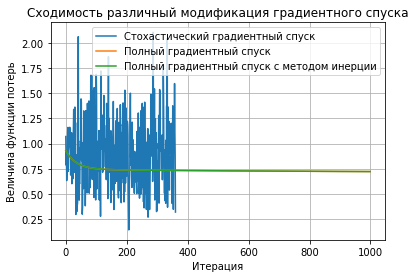

In [724]:
lr_pipeline=Pipeline([
    ('std_scaler', MinMaxScaler()),
    ('lr', HuberReg(delta=1.0, gd_type='stochastic', tolerance=1e-4, max_iter=1000,  alpha=0, eta=1e-3)),      
])
q=lr_pipeline.fit(x_train,y_train)
stoch=q.named_steps.lr.loss_history
stoch=pd.DataFrame(stoch)
lr_pipeline=Pipeline([
    ('std_scaler', MinMaxScaler()),
    ('lr', HuberReg(delta=1.0, gd_type='full',tolerance=1e-4, max_iter=1000,  alpha=0, eta=1e-3)),
])
q=lr_pipeline.fit(x_train,y_train)
full=q.named_steps.lr.loss_history
full=pd.DataFrame(full)
lr_pipeline=Pipeline([
    ('std_scaler', MinMaxScaler()),
    ('lr', HuberReg(delta=1.0, gd_type='full',tolerance=1e-4, max_iter=1000,  alpha=1e-6, eta=1e-3)),
])
q=lr_pipeline.fit(x_train,y_train)
moment=q.named_steps.lr.loss_history
moment=pd.DataFrame(full)

plt.plot(stoch.index.tolist(), stoch, label=u"Стохастический градиентный спуск")
plt.plot(full.index.tolist(), full, label=u"Полный градиентный спуск")
plt.plot(moment.index.tolist(), moment, label=u"Полный градиентный спуск с методом инерции")
plt.title(u"Сходимость различный модификация градиентного спуска")
plt.xlabel(u"Итерация")
plt.ylabel(u"Величина функции потерь")
plt.grid()
plt.legend()

plt.show() 
#Полный градиентный спуск схожится быстрее, чем стохастический, но так же как и с методом моментов(различия незаметны)